In [34]:
import numpy as np
import pandas as pd

In [35]:
from sklearn.datasets import make_regression
X,y= make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1, noise=80, random_state=13)
X,y

(array([[-0.71239066],
        [ 0.45181234],
        [-0.04450308],
        [ 0.75376638]]),
 array([  7.21786552,  16.04609925, -27.83756166, 144.36688189]))

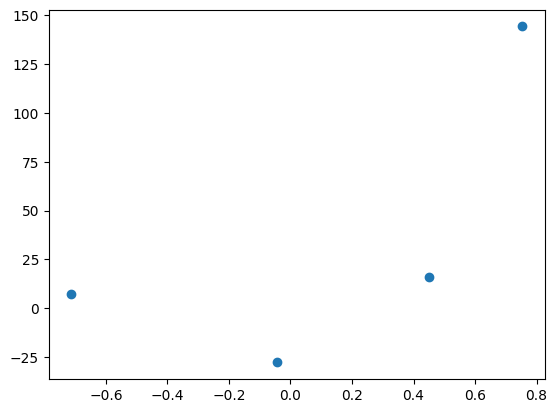

In [36]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [37]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)
reg.coef_, reg.intercept_

(array([78.35063668]), 26.15963284313262)

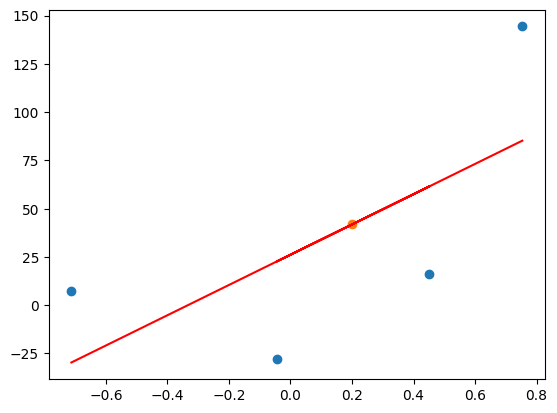

In [38]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red')
plt.scatter(0.2, reg.predict([[0.2]]))

# Manually running iterations

In [39]:
# Lets apply gradient descent assuming slope is constant: m=78.35
# Lets assume the starting value for intercept: b=0
# plotting a initial line for b=0
b_initial = 100
y_pred = ((78.35 * X)+ b_initial)
y_pred
# y_pred.ravel() # converts to 1D

array([[ 44.18419163],
       [135.39949674],
       [ 96.51318381],
       [159.05759577]])

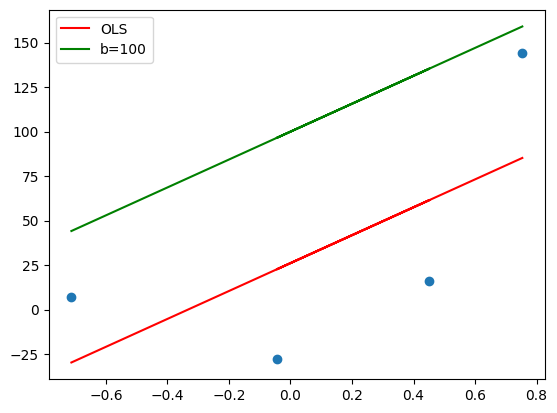

In [40]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X), color='red', label='OLS')
plt.plot(X,y_pred, color='green', label=f'b={b_initial}')
plt.legend()
plt.show()

First Iteration

In [41]:
m = 78.35
b = b_initial
loss_slope = -2* np.sum(y - m * X.ravel() - b)
loss_slope

590.7223659179078

In [42]:
lr = 0.1
step_size = loss_slope * lr
step_size

59.072236591790784

In [43]:
b = b - step_size
b

40.927763408209216

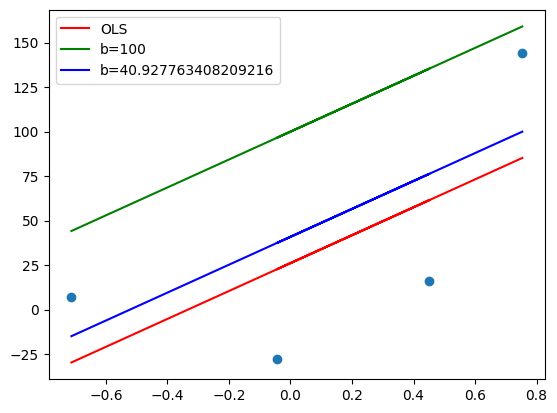

In [44]:
y_pred1 = ((78.35 * X) + b).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X), color='red', label = 'OLS')
plt.plot(X, y_pred, color='green', label =f'b={b_initial}')
plt.plot(X, y_pred1, color='blue', label =f'b={b}')
plt.legend()
plt.show()

Second Iteration

In [45]:
loss_slope = -2 * np.sum(y - 78.35 * X.ravel() - b)
loss_slope
step_size = lr * loss_slope
b = b - step_size
b

29.11331608985106

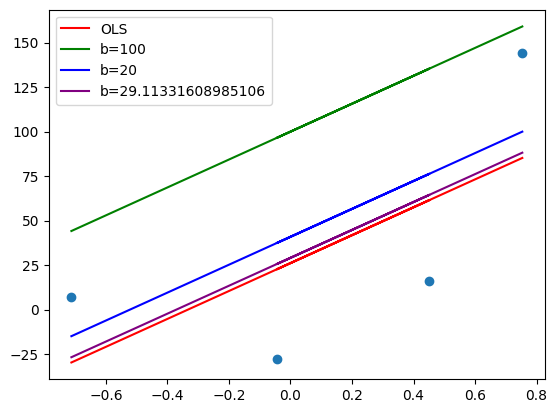

In [46]:
y_pred2 = ((78.35 * X) + b).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X), color='red', label='OLS')
plt.plot(X,y_pred, color='green', label=f'b={b_initial}')
plt.plot(X,y_pred1, color='blue', label='b=20')
plt.plot(X,y_pred2, color='purple', label=f'b={b}')
plt.legend()
plt.show()


Third Iteration

In [47]:
loss_slope = -2 * np.sum(y - 78.35*X.ravel()-b)
loss_slope
step_size = lr*loss_slope
step_size
b = b - step_size
b

26.750426626179426

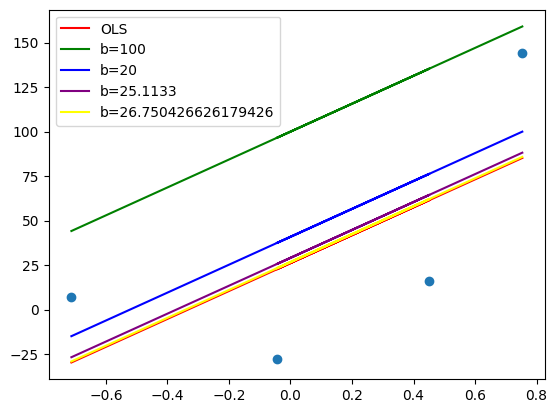

In [48]:
y_pred3 = (78.35 * X + b).reshape(4)
plt.scatter(X,y)
plt.plot(X,reg.predict(X), color='red', label='OLS')
plt.plot(X,y_pred, color='green', label=f'b={b_initial}')
plt.plot(X,y_pred1, color='blue', label='b=20')
plt.plot(X,y_pred2, color='purple', label='b=25.1133')
plt.plot(X,y_pred3, color='yellow', label=f'b={b}')
plt.legend()

# Manually iterating in loop

-28.642614658664044

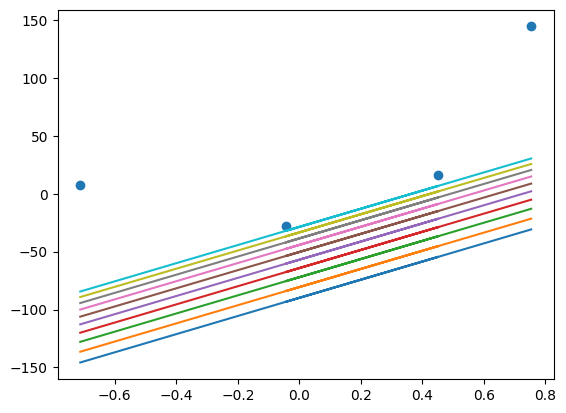

In [49]:
b = -100
m = 78.35
lr = 0.01
epochs = 10

plt.scatter(X,y)
for i in range (epochs):
  loss_slope = -2 * np.sum(y - 78.35 * X.ravel() - b)
  b = b - lr * loss_slope
  y_pred = m * X + b
  plt.plot(X,y_pred)
b